In [42]:
import pandas as pd
import numpy as np


In [43]:
df = pd.read_csv('D:/test/2019.csv')

In [44]:
df.head(20)

,Time Stamp,Name,PTID,Load
0,2020/01/01 00:05:00,N.Y.C.,61761,4972.8
1,2020/01/01 00:10:00,N.Y.C.,61761,4936.6
2,2020/01/01 00:15:00,N.Y.C.,61761,4928.8
3,2020/01/01 00:20:00,N.Y.C.,61761,4929.0
4,2020/01/01 00:25:00,N.Y.C.,61761,4938.6
5,2020/01/01 00:30:00,N.Y.C.,61761,4924.1
6,2020/01/01 00:35:00,N.Y.C.,61761,4926.0
7,2020/01/01 00:40:00,N.Y.C.,61761,4872.9
8,2020/01/01 00:45:00,N.Y.C.,61761,4884.8
9,2020/01/01 00:50:00,N.Y.C.,61761,4856.7


In [45]:
df = df.rename(columns = {"Time Stamp": "Date"})

In [46]:
df.Date = pd.to_datetime(df.Date)

In [47]:
# df.set_index('Date', inplace = True)

In [48]:
df.shape

(143617, 4)

In [49]:
df.drop(columns = 'PTID', inplace=True)

In [50]:
df.head()

,Date,Name,Load
0,2020-01-01 00:05:00,N.Y.C.,4972.8
1,2020-01-01 00:10:00,N.Y.C.,4936.6
2,2020-01-01 00:15:00,N.Y.C.,4928.8
3,2020-01-01 00:20:00,N.Y.C.,4929.0
4,2020-01-01 00:25:00,N.Y.C.,4938.6


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143617 entries, 0 to 143616
Data columns (total 3 columns):
Date    143617 non-null datetime64[ns]
Name    143617 non-null object
Load    143614 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.3+ MB


In [52]:
df.Name.nunique()

1

In [53]:
reg = df.Name.unique().tolist()

In [54]:
df_2 = df.groupby(df.Date).sum()

In [55]:
df_2.shape

(143605, 1)

In [56]:
for i in reg:
    df_bill = df.groupby(['Date', df['Name'].loc[df.Name == i]]).sum()    
    df_bill.reset_index(inplace=True)
    df_bill.set_index('Date', inplace=True)
    df_2[i] = df_bill['Load']

In [57]:
# df_bill = df.groupby(['Date', df['Name'].loc[df.Name == 'CAPITL']]).sum()
# df_bill.head()
# df_bill.reset_index(inplace=True)
# df_bill.set_index('Date', inplace=True)
# df_bill.head()
# df_2['CAPITL'] = df_bill['Load']

In [58]:
df_2.head()

,Load,N.Y.C.
Date,,
2020-01-01 00:05:00,4972.8,4972.8
2020-01-01 00:10:00,4936.6,4936.6
2020-01-01 00:15:00,4928.8,4928.8
2020-01-01 00:20:00,4929.0,4929.0
2020-01-01 00:25:00,4938.6,4938.6


In [59]:
df_2.shape

(143605, 2)

In [60]:
df_2 = df_2.rename(columns = {"Load": "Total_Load"})

In [61]:
#garbo for now



from matplotlib import pyplot as plt
# import seaborn as sns
# %matplotlib inline 
# x = df_2.index
# sns.pairplot(df_2,
#              x_vars= x,
#              y_vars='Load',
#              height=5,
#              plot_kws={'alpha':.9, 'linewidth':0}
#             )
# plt.suptitle('something')
# plt.show()

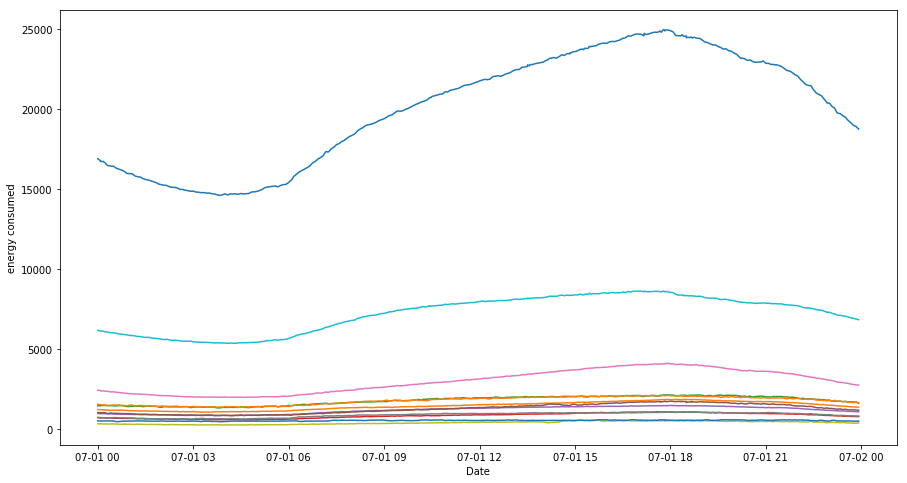

In [20]:
plt.figure(figsize=(15,8))
plt.xlabel('Date')
plt.ylabel('energy consumed')
plt.plot(df_2.index,df_2)
plt.show()

In [62]:
df_2.to_csv(r'D:/test/data1.csv')